<h1>The Tesla Stock Price -- From 06/29/2017 to 03/17/2017</h1> 

--------------------------

<h3>The Universal Workflow of Machine Learning</h3>

<p>
1. Defining the problem and assembling a dataset<br>
2. Choosing the measure of success<br>
3. Deciding on an evaluation protocol<br>
4. Preparing the dataset<br>
5. Developing a model that does better than a baseline<br>
6. Scaling up: developing a model that overfits<br>
7. Regularising the overfitting model and tuning the hyperparameters<br>
8. Retraining the network with the entire training set and evaluating on the unseen test set
</p>

<h3>Defining the problem and assembling a dataset</h3>

--------------------------
Dataset downloaded and included with the note from:<a href="https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price?resource=download">Click to visit kaggle</a>

<h4>Content</h4>
Within the dataset, one will encounter the following:

<ul>
    <li>The date - "Date"</li>
    <li>The opening price of the stock - "Open"</li>
    <li>The high price of that day - "High"</li>
    <li>The low price of that day - "Low"</li>
    <li>The closed price of that day - "Close"</li>
    <li>The number of stocks traded during that day - "Volume"</li>
    <li>The stock's closing price has been amended to include any distributions/corporate actions that occur before the next day open - "Adj[usted] Close"</li>
</ul>

<h3>Hypotheses </h3>

--------------------------
<br>The following hypotheses were made:</br>
<br>That the outputs can be predicted from the inputs</br>
<br>The available data is sufficiently informative to learn the relationship between inputs and outputs.</br>


<h3>Methodology</h3>

For this assignment, I will try to predict the stock's high price from the same dataset from my last assignment but with RNN and LSTM  to predict future stock's high price. I have learned from my last attempt to continue with the same style in trying out different techniques and training skills, identifying over and under-fittings to improve from the baseline model.

The reason for using the same dataset is that I could not achieve the actual financial needs in future predictions.
I started with the wrong approach because, at the start, I didn't fully understand how to implement RNN with LSTM, but eventually, I realized my mistake and could start over.

1. prepare the data<br>
2. build a multi-baseline model<br>
    a. visual evaluation<br>
    b. statistical evaluation<br>
    c. test evaluation <br>
    d. summary<br>
3. try building models that beats baseline<br>
    a. visual evaluation<br>
    b. statistical evaluation<br>
    c. test evaluation <br>
    d. summary<br>
4. switch to LSTM<br>
    a. visual evaluation<br>
    b. statistical evaluation<br>
    c. test evaluation <br>
    d. summary<br>
5. experiment with different model hyperparameters<br>
    a. visual evaluation<br>
    b. statistical evaluation<br>
    c. test evaluation <br>
    d. summary<br>
6. conclusion<br>
    a. summary of the results by justifying the best model and whether I have beaten the baseline<br>
    b. what I have learned<br>
    c. what I would do next<br>

<h3>Preparing the dataset</h3>

-------------------------

Import libraries

In [103]:
# import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

SEED=1
np.random.seed(SEED)
tf.random.set_seed(SEED)

import keras
from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.layers import Softmax

Read the CSV file using pandas:

In [61]:
# Load the data from csv
df = pd.read_csv('D:\\jupyter\\assignment\\Tesla.csv',parse_dates= True, index_col="Date") 

Check the data set for type, null values and outliers.

In [62]:
df.dtypes
df.head()
df.describe() #check for outliers
df.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


Create a Heatmap of the correlation between the features within the dataset<br>

From the heatmap below, it is clear that the Adj Close is highly correlated with the Close, Open, High and Low. This is expected as the Adj Close is the closing price that has been amended to include any distributions/corporate actions that occur before the next day's open. The Volume is not correlated with any of the other features.

<AxesSubplot:>

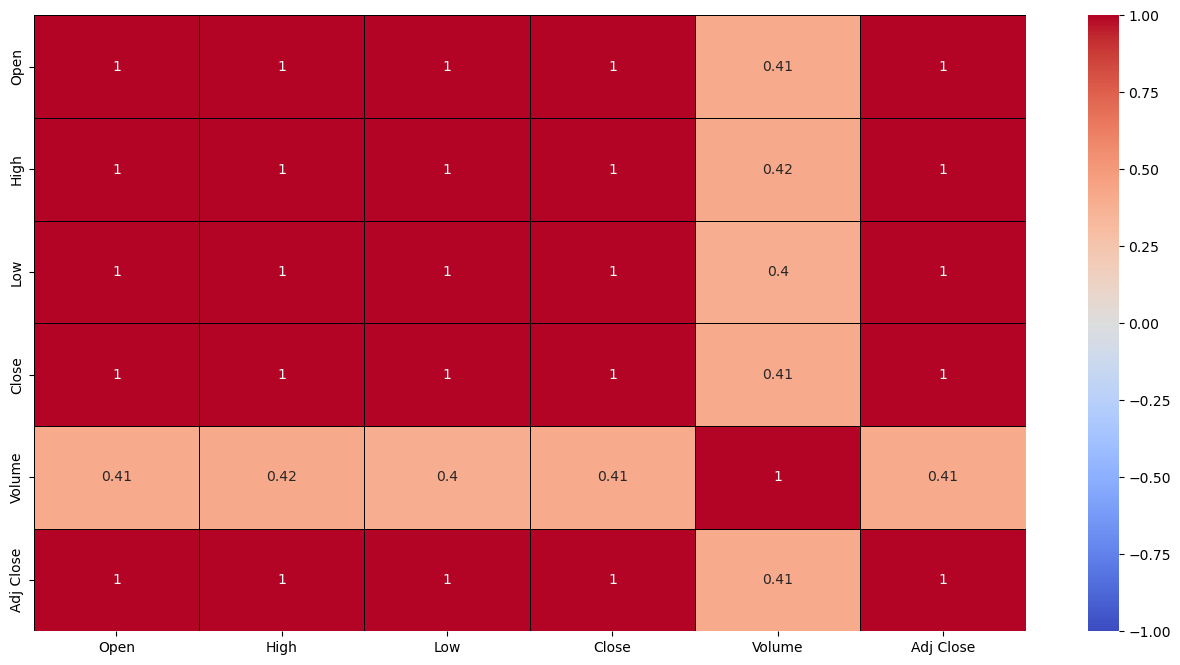

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black')

Creating box plots to check for outliers<br>
The result below shows that there are no outliers based on the heatmap in the dataset

<AxesSubplot:>

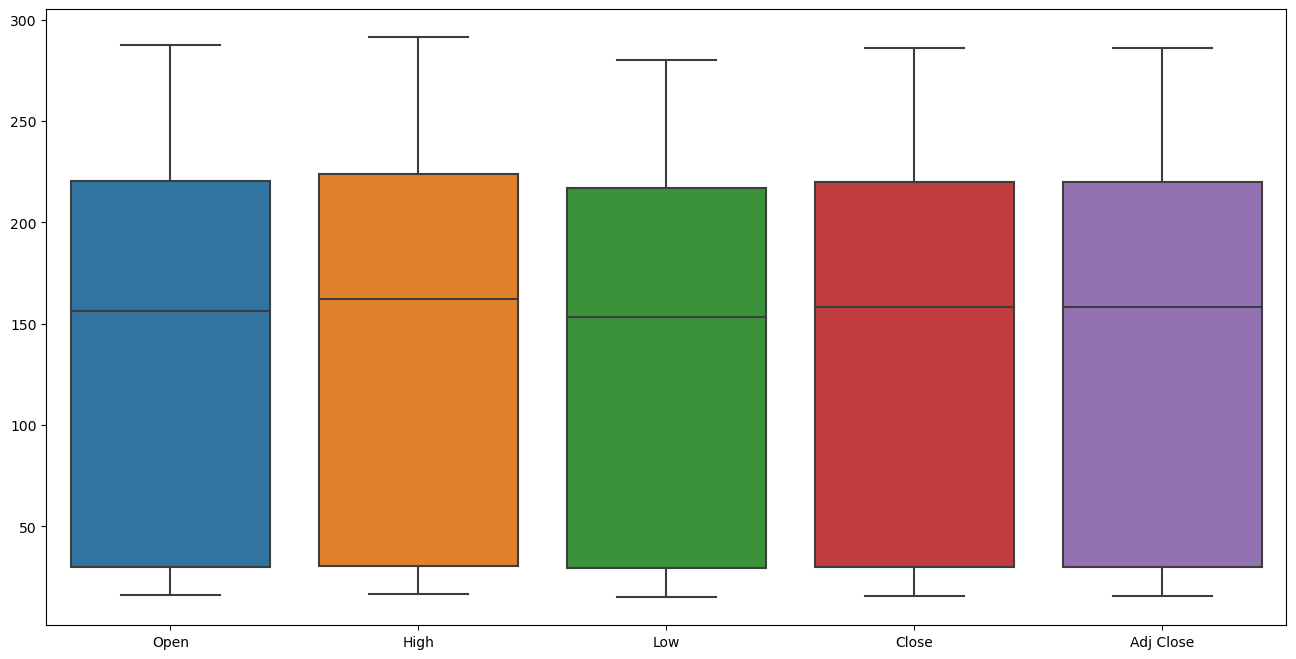

In [64]:
plt.figure(figsize=(16,8))
important_features = ['Open', 'High', 'Low', 'Close', 'Adj Close'] #select the features
sns.boxplot(data=df[important_features])

Plot the data to see the trend of the stock price to check any linear relationship between the features and the target<br>
The result below shows that there is a linear relationship between the features and the target except for the Volume, which is not linearly related to the target, and proven that the Volume is not correlated with any of the other features.<br>
We will drop the Volume feature from the dataset.

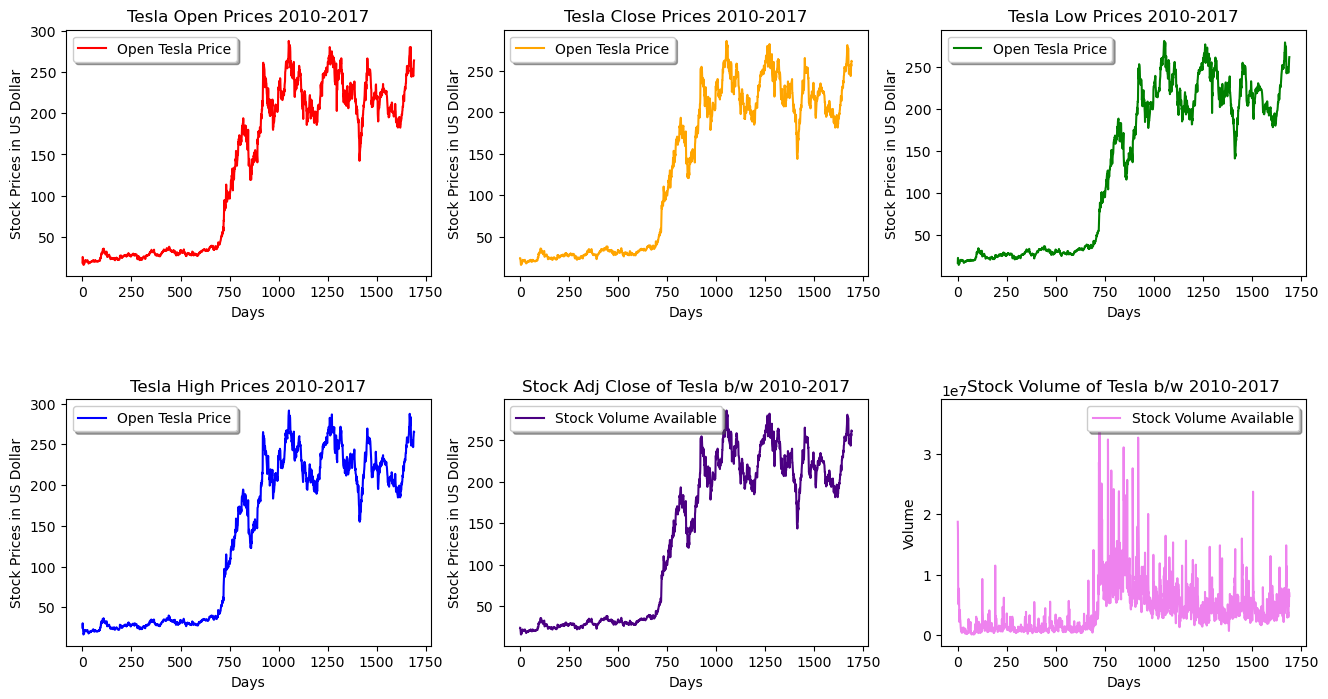

In [65]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
# open
plt.subplot(2,3,1) #2 rows, 1 column, 1st plot
plt.plot(df.Open.values, color = "red", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Open Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# close
plt.subplot(2,3,2) #2 rows, 1 column, 1st plot
plt.plot(df.Close.values, color = "orange", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Close Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# low
plt.subplot(2,3,3) #2 rows, 1 column, 1st plot
plt.plot(df.Low.values, color = "green", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Low Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# high
plt.subplot(2,3,4) #2 rows, 1 column, 1st plot
plt.plot(df.High.values, color = "blue", label = "Open Tesla Price") #plot the open price
plt.title("Tesla High Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend 

# adj close
plt.subplot(2,3,5) #2nd plot
plt.plot( df['Adj Close'].values, color = "indigo", label = "Stock Volume Available")
plt.title("Stock Adj Close of Tesla b/w 2010-2017")
plt.xlabel("Days")
plt.ylabel("Stock Prices in US Dollar")
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# volume
plt.subplot(2,3,6) #2nd plot
plt.plot( df.Volume.values, color = "violet", label = "Stock Volume Available")
plt.title("Stock Volume of Tesla b/w 2010-2017")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# plot the data
plt.show()


<h3>Normalizing the data with sklearn</h3>

In [66]:
x = df.drop(['High','Volume'], axis=1) #drop the features that we don't need
y = df['High'] #set the target variable

Split the dataset to train,cross validate, test in ratio of 80% + 10% + 10% 

In [67]:
# from sklearn.model_selection import train_test_split

#Split the data into 80% training and 10% testing and 10% validation
#first split the data into 80% training and 20% remaining
x_train,x_remaining,y_train,y_remaining= train_test_split(x,y,test_size=0.2,random_state=SEED)

#then split the remaining data into 50% testing and 50% validation of the remaining data which is 20% of the original data
x_validation,x_test,y_validation,y_test= train_test_split(x_remaining,y_remaining,test_size=0.5,random_state=SEED)

# training set
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_validation = x_validation.to_numpy()

# target/lables set
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_validation = y_validation.to_numpy()

-------------------------
<h3>Resuable function section for easy access</3>

Function to plot model performance 

In [68]:
def plot_mae(history,range,title): #plot the mae
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.ylabel('Validation mae')
    plt.xlabel('Epochs')
    plt.plot(history['mae'][:range], label='Training mae', color='red')
    plt.plot(history['val_mae'][:range], label='Validation mae', color='green')
    # set x interval to 1
    plt.xticks(np.arange(0, range, 1.0))

    plt.legend(
        loc='upper right',
        shadow=True,
        fontsize='x-large'
    )
    plt.show()

In [69]:
# Create a time series with a time window 
def create_timeseries(data, time_window):
    X = []
    y = []
    for i in range(len(data) - time_window):
        X.append(data[i:i+time_window])
        y.append(data[i+time_window])
    X = np.array(X)
    y = np.array(y)
    return X, y

-------------------------

<h1>Developing multiple baseline</h1><br>
(Wrong approach) As usual, I started developing baselines, but since the dataset I created needed to be corrected, this model became useless, and I had to start over again.

With RNNs, it is often a good idea to have baseline metrics to compare against to make a valuable conclusion about our model performance, as a wrong conclusion can lead to wrong decisions and thinking that our model works great when it is doing worse than basic models.

Baseline Metrics for Regression Problems from privious assignment.

In [70]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
def build_baseline_model(): #build the model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))
    
    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model


def train_Model(model,epochs):
    
    #train the model
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_validation,y_validation),
        epochs=epochs, batch_size=512, verbose=0, 
    )
    return history.history

baseModel  = build_baseline_model()
baseHistory = train_Model(baseModel,10)


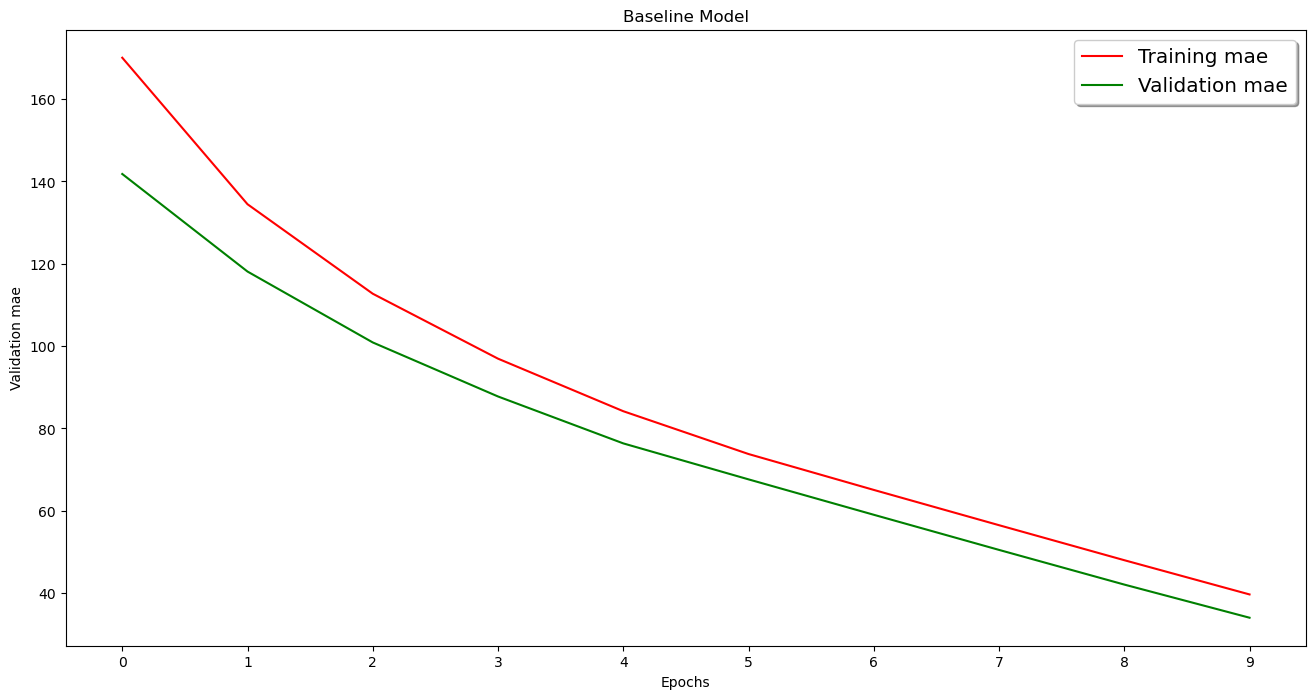

In [71]:
plot_mae(baseHistory,10,"Baseline Model")

In [72]:
## validate the model agianst the test data
baselineMse = mean_squared_error(y_test, baseModel.predict(x_test))
print("Baseline test MSE: ", baselineMse)

6/6 [==============================] - 0s 2ms/step
Baseline test MSE:  1643.1486923396315


<h3>Reviewing the baseline</h3>

As you can see the linear regresion model predicted the stock price with a mean absolute error of 0.5. This is a good baseline to compare against the RNN model. For the RNN model, I will use the same metric to compare each model to determine the best solution for this problem with the given dataset.


-------------------------

<h1>Recurrent Networks(RNNs) </h1> Wrong approch again since the dataset was wrong
<h3>Implementing a simple RNN model</h3>

In 'TensorFlow.Keras it has three RNN layers: 'SimpleRNN', 'GRU' and 'LSTM'.<br>

Having more baseline metric models because, according to the book, it is often a good idea to have a few baseline metrics, or else we may end up thinking our model works great when in fact, it is doing worse than basic models. (GERON, 2019)

My plan for the Recurrent network is to start with a simple RNN model that can predict one step into the future, building gradually to a model that can predict 3 steps into the future, which is what financial analysts are interested in. I have chosen 3 days in advance because it is a good balance as the stock market is only open during the week. Therefore three days is a good balance between the number of days for the days when the stock market is open.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


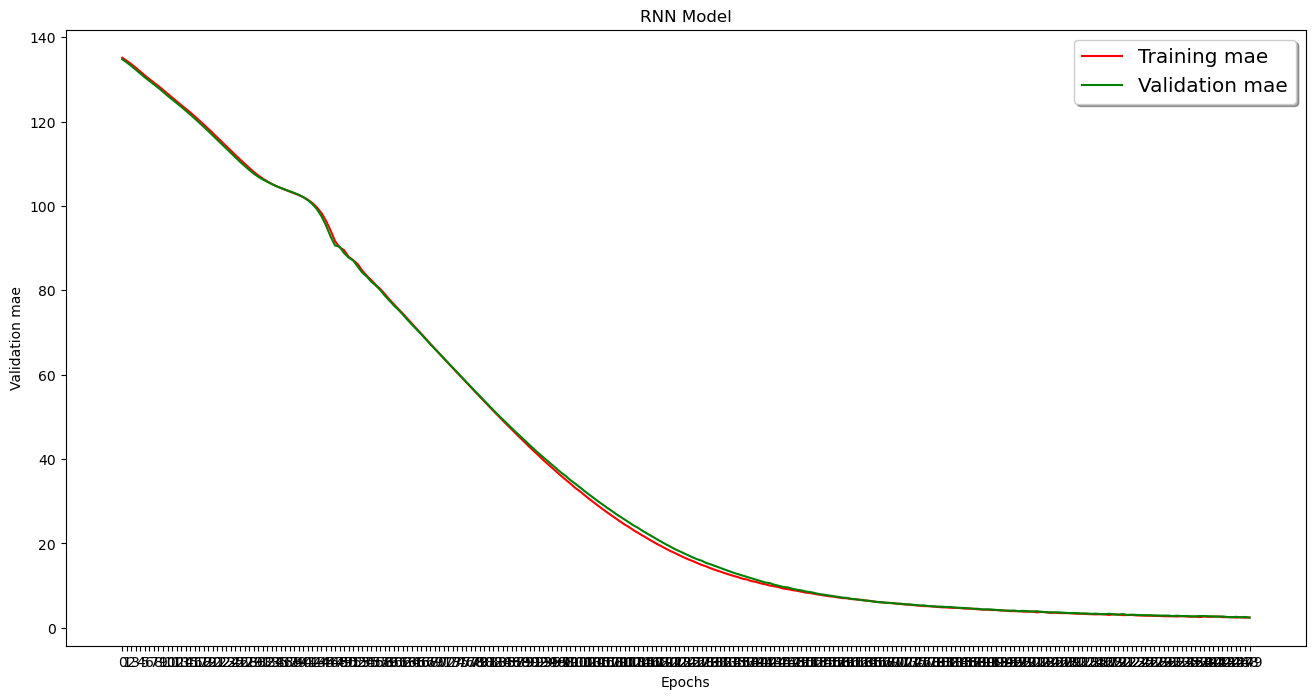

In [73]:
RNNmodel = keras.models.Sequential([
    keras.layers.SimpleRNN(64, input_shape=(x_train.shape[1], 1)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

RNNmodel.compile(loss="mse", optimizer="adam", metrics=["mae"])

RNNmodel.summary()

RNNmodelResult = train_Model(RNNmodel,250)

plot_mae(RNNmodelResult,250,"RNN Model")

In [74]:
# validate the model agianst the test data
RNNMse = mean_squared_error(y_test, RNNmodel.predict(x_test))
print("RNN test MSE: ", RNNMse)

6/6 [==============================] - 0s 5ms/step
RNN test MSE:  27.269155575893457


The above graph shows that the model is underfitting the data. The result shows that the model is overly optimistic, as the model was using the same data during training. The model performance is too good to be true.<br>
However, I finally realised that I was not predicting the future because I had set up my dataset wrong. What my dataset should look like: <br>-- past 3 days of data , <br>--  4 th day target—using previous data to predict a future target value.

<!--  -->

<h1>Implementing Correct model</h1>

-------------------------



To make it easy as a start but moving forward to LSTM model, I will need to generate the correct dataset first then predict a day time step into the future with sigular column of target value "High". 

In [75]:
y = df['High'] #set the target variable
data = y.values

Normalizing the data with sklearn with MinMaxScaler

In [76]:
scaler = MinMaxScaler(feature_range=(0, 1)) #scale the data
data = scaler.fit_transform(data.reshape(-1, 1))

Calling create_timeseries to create the correct dataset, using past 3 days of data to predict the next day target value.

past day 1 , past day 2, past day 3 > target day tomorrow

In [77]:
X, y = create_timeseries(data, 1)

In [78]:
# # print both shapes
# print(data.shape)
# print(X.shape)
# print(y.shape)

I have to reshape y to ensure that it is the same dim as the input data, other wise the model will not be able to train and throw an error.

In [79]:
y = y.reshape(y.shape[0],1,1) #reshape the data to 3D

Split the dataset to train,cross validate, test in ratio of 80% + 10% + 10%

In [80]:
x_train, x_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2)
x_validation, x_test, y_validation, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

Shape checking to ensure that the data is in the correct shape

In [81]:
# check shape
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

# check shape
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(1352, 1, 1)
(169, 1, 1)
(170, 1, 1)
(1352, 1, 1)
(169, 1, 1)
(170, 1, 1)


<h1>Simple RNN model retraining with the correct dataset</h1>

In [82]:
RNNmodel1 = keras.models.Sequential([
    keras.layers.SimpleRNN(64, input_shape=(x_train.shape[1], 1)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

RNNmodel1.compile(loss="mse", optimizer="adam", metrics=["mae"])

RNNmodel1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [83]:
RNNmodel1History = RNNmodel1.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=25, batch_size=512, verbose=0)

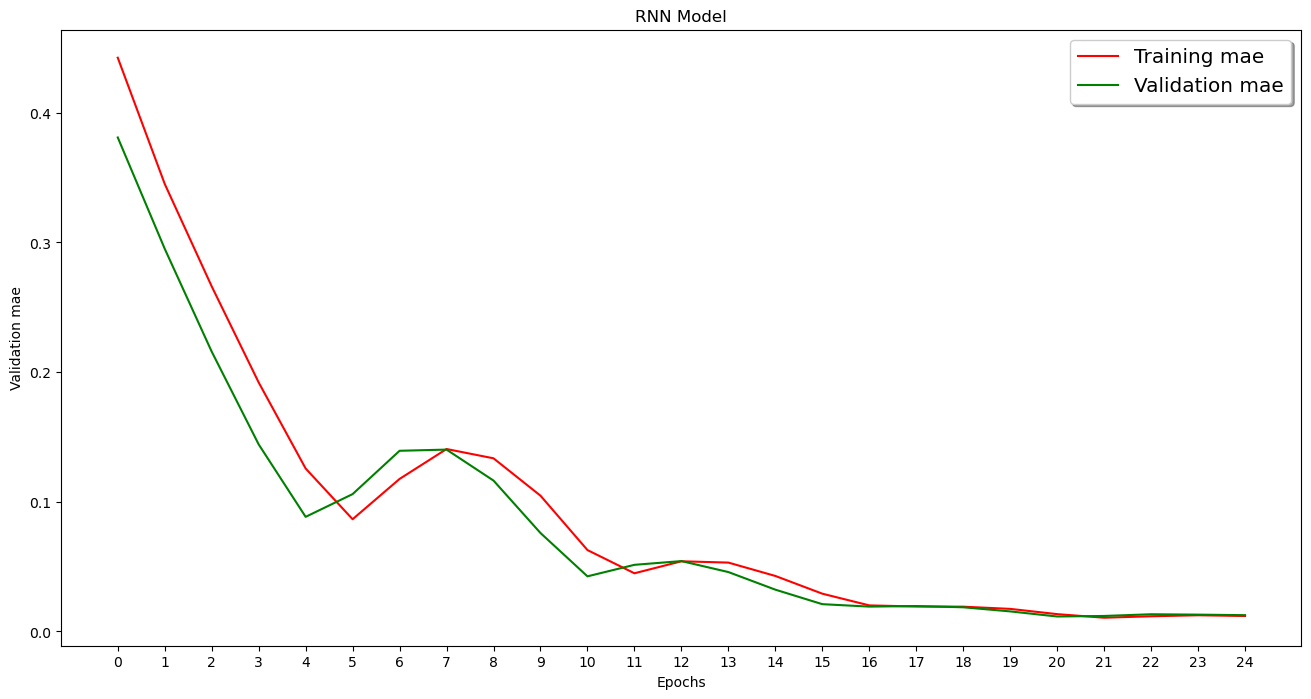

In [84]:
# plot the mae
plot_mae(RNNmodel1History.history,25,"RNN Model")

In [85]:
# predict the test data
predic = RNNmodel1.predict(x_test)

# reshape predic to 1dim
predic = predic.reshape(predic.shape[0],)

y_test_reshaped = y_test.reshape(y_test.shape[0],)

# validate the model agianst the test data
RNNMse1 = mean_squared_error(y_test_reshaped, predic)
print("RNN test MSE: ", RNNMse1)


6/6 [==============================] - 0s 3ms/step
RNN test MSE:  0.0003104747402564267


The simpleRNN model training with the correct dataset scored a mse of 0.0003. This is a really good score for baseline model. 
<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse</th>
  </tr>
  <tr>
    <td>RNNmodel1</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>25</td>
    <td>0.0003104747402564267</td>
  </tr>
</table>

<h1>Switch to LSTM layer with return_sequences</h1>

Building a new model with LSTM layers and set return_sequences=True to return the full sequence of outputs for each input sequence. This is needed for the next layer to be able to process the entire sequence.
New configs:<br>
- increase number of layers
- increase number of neurons
- Adding dropout layer 
- Adding optimizer and learning rate

In [86]:
RNNmodel2 = keras.models.Sequential([ # create the model
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]), # add the first layer
    keras.layers.LSTM(64, return_sequences=True), # add the second layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(128, return_sequences=True), # add the third layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the fourth layer
    keras.layers.TimeDistributed(keras.layers.Dense(1)) # add the output layer
])

In [87]:
optimizer = keras.optimizers.Adam(lr=0.01) # set the optimizer

c:\Users\admin\Anaconda3\envs\ai\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Indroducing learning rate 0.01 with optimizer Adam

In [88]:
RNNmodel2.compile(loss="mse", optimizer=optimizer, metrics=["mae"])

RNNmodel2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 32)          4352      
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          24832     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_6 (LSTM)               (None, None, 128)         98816     
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, None, 64)          49408     
                                                                 
 time_distributed_1 (TimeDis  (None, None, 1)        

In [89]:
RNNmodel2History = RNNmodel2.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_validation,y_validation), verbose=0)

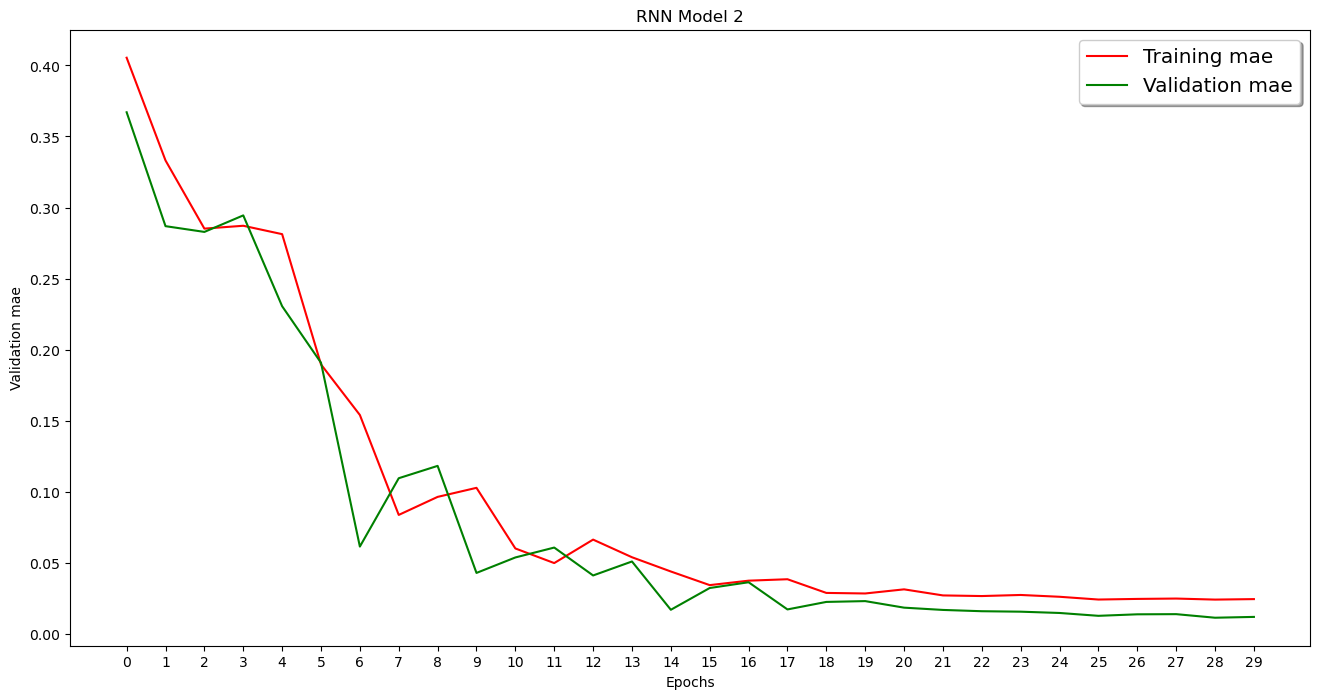

In [90]:
plot_mae(RNNmodel2History.history,30,"RNN Model 2")

The above graph shows that the model starts with underfitting the data, then it starts to overfit the data and eventually parallel to the training. Increasing the number of epochs will not help. I will consider other techniques to improve the model's performance.

In [91]:
# predict on the test data
y_pred = RNNmodel2.predict(x_test)

# print y_pred shape
print(y_pred.shape)
print (y_test.shape)

# inverse the scaling and reshape the data
y_pred = y_pred.reshape(-1, 1)
y_test_inv = y_test.reshape(-1, 1)

# calculate the mse
mse = mean_squared_error(y_test_inv, y_pred)

print("MSE: ", mse)

6/6 [==============================] - 1s 6ms/step
(170, 1, 1)
(170, 1, 1)
MSE:  0.0002955482432834089


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse</th>
  </tr>
  <tr>
    <td>RNNmodel1</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>25</td>
    <td>0.0003104747402564267</td>
  </tr>
  <tr>
    <td>RNNmodel2(LSTM)</td>
    <td>7</td>
    <td>6</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>30</td>
    <td>0.0002955482432834089</td>
</table>

As you can see the model 2 is performing better than model 1 with about 0.00002 mse difference in the test prediction. Now I will try with 3 days into the future prediction

-------------------------

<h1> N days into the future</h1>
An easy to predict 3 days into the future is taking the first prediction and using it as the input for the next prediction. This is a simple way to predict 3 days into the future. However, the longer the prediction, the performance will be worse.

Using RNNmodel2 To predict 3 days into the future and store the result in a dataframe for easy access.

In [92]:
# below code can't be turned into a function because of different model might have different input shape and output shape, so it's not reusable for other models
three_days=[] 
for i in range(x_test.shape[0]):
        # make a prediction on the first sequence
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
        p = y_test_inv[i]
        p = p[0]

        # make a prediction on the fist x_test sequence
        d1 = RNNmodel2.predict(x_test[i].reshape(1,1,1))
        d1_inv = scaler.inverse_transform(d1.reshape(-1, 1))
        d1_inv = d1_inv[0][0]

        d2 = RNNmodel2.predict(d1)
        d2_inv = scaler.inverse_transform(d2.reshape(-1, 1))
        d2_inv = d2_inv[0][0]

        d3 = RNNmodel2.predict(d2)
        d3_inv = scaler.inverse_transform(d3.reshape(-1, 1))
        d3_inv = d3_inv[0][0]

        # store actual, d1, d2, d3 into a list
        three_days.append([p,d1_inv,d2_inv,d3_inv])

        print("Actual: ",p," Predict day 1: ",d1_inv," Predict day 2: ",d2_inv," Predict day 3: ",d3_inv)


1/1 [==============================] - 0s 19ms/step
Actual:  28.35  Predict day 1:  27.164768  Predict day 2:  26.644169  Predict day 3:  26.224293
1/1 [==============================] - 0s 21ms/step
Actual:  159.789993  Predict day 1:  156.2849  Predict day 2:  155.40707  Predict day 3:  154.37196
1/1 [==============================] - 0s 23ms/step
Actual:  20.9  Predict day 1:  21.847076  Predict day 2:  22.376568  Predict day 3:  22.800333
1/1 [==============================] - 0s 21ms/step
Actual:  20.27  Predict day 1:  20.903542  Predict day 2:  21.630558  Predict day 3:  22.207138
1/1 [==============================] - 0s 20ms/step
Actual:  27.360001  Predict day 1:  26.709867  Predict day 2:  26.272366  Predict day 3:  25.92552
1/1 [==============================] - 0s 18ms/step
Actual:  24.030001  Predict day 1:  24.094812  Predict day 2:  24.165606  Predict day 3:  24.225637
1/1 [==============================] - 0s 19ms/step
Actual:  24.280001  Predict day 1:  24.351873  Pre

In [93]:
# print the list in a dataframe
df3days = pd.DataFrame(three_days, columns=["Actual","Predict day 1","Predict day 2","Predict day 3"])
df3days

,Actual,Predict day 1,Predict day 2,Predict day 3
0,28.350000,27.164768,26.644169,26.224293
1,159.789993,156.284897,155.407074,154.371964
2,20.900000,21.847076,22.376568,22.800333
3,20.270000,20.903542,21.630558,22.207138
4,27.360001,26.709867,26.272366,25.925520
...,...,...,...,...
165,25.490000,24.872610,24.793102,24.728733
166,29.700001,28.042500,27.361366,26.807814
167,24.000000,24.290558,24.322269,24.351873
168,28.530001,28.872179,28.040058,27.361366


As you can see, I could predict days into the future with my custom function. However, I could not validate the day2 and day3 results because it requires creating a separate dataset to justify against. However, the model predicting 3 days into the future is good enough if no external factors can affect the stock price, like war, pandemic, etc. 

<h1>More experiments</h1>
- call back function early stopping to stop the training when the model is not improving<br>
- change optimizer to RMSprop<br>
- add dropout layer after input layer

In [97]:
RNNmodel3 = keras.models.Sequential([ # create the model
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]), # add the first layer
    Dropout(0.1), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the second layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(128, return_sequences=True), # add the third layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the fourth layer
    keras.layers.TimeDistributed(keras.layers.Dense(1)) # add the output layer
])

callbacks = [keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')] # set the early stopping

RNNmodel3.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

RNNmodel3history = RNNmodel3.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validation,y_validation), callbacks=callbacks, verbose=0)

In [99]:
RNNmodel3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, None, 32)          4352      
                                                                 
 dropout_7 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm_13 (LSTM)              (None, None, 64)          24832     
                                                                 
 dropout_8 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_14 (LSTM)              (None, None, 128)         98816     
                                                                 
 dropout_9 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_15 (LSTM)              (None, None, 64)        

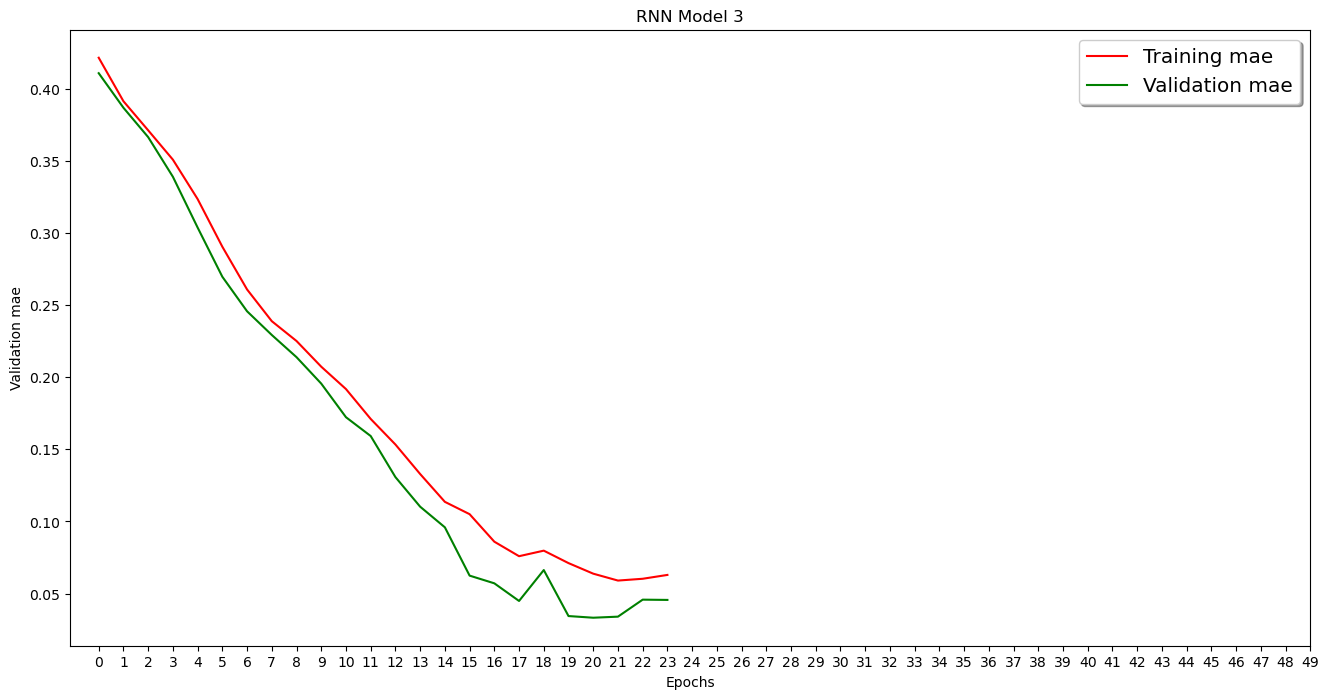

In [98]:
# plot the history
plot_mae(RNNmodel3history.history,50,"RNN Model 3")

The above graph shows that the model is always underfitting, where validation loss is always lower than training loss. The model also stopped early at epoch 24, meaning that it is no longer improving; therefore, it is not worth training further and stopped itself.

In [96]:
# predict on the test data
y_pred = RNNmodel3.predict(x_test)

# priont the shape
print(y_pred.shape)
print (y_test.shape)

# reshape down to 1D
y_pred = y_pred.reshape(y_pred.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)


# calculate the mse
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

6/6 [==============================] - 1s 7ms/step
(170, 1, 1)
(170, 1, 1)
MSE:  0.001738154260858454


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse</th>
  </tr>
  <tr>
    <td>RNNmodel1</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>25</td>
    <td>0.0003104747402564267</td>
  </tr>
  <tr>
    <td>RNNmodel2(LSTM)</td>
    <td>7</td>
    <td>6</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>30</td>
    <td>0.0002955482432834089</td>
  </tr>
  <tr>
    <td>RNNmodel3(LSTM)</td>
    <td>8</td>
    <td>7</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>RMSprop</td>
    <td>24</td>
    <td>0.001738154260858454</td>
</table>

The table shows that model 3 performs worse than baseline and model 2 as mse increased significantly higher than both. This is one of the possible outcomes when experimenting with different parameters, significantly changing the optimizer. My next step is to increase the number of time steps to 14 days, change some activation functions to see how the model performs and compare it against with rest of the models.

-------------------------

<h1>Increase Time steps and activation function</h1>

increase time steps to 14 days and create dataset

In [108]:
X, y = create_timeseries(data , 14)

# split the data into train and test
x_train, x_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2)
x_validation, x_test, y_validation, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

change activation function to softmax

In [114]:
RNNmodel4 = keras.models.Sequential([ # create the model
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]), # add the first layer
    Dropout(0.1), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True,activation = Softmax), # add the second layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(128, return_sequences=True), # add the third layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the fourth layer
    keras.layers.TimeDistributed(keras.layers.Dense(1)) # add the output layer
])

callbacks = [keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')] # set the early stopping

RNNmodel4.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

RNNmodel4history = RNNmodel4.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validation,y_validation), callbacks=callbacks, verbose=0)

TypeError: Exception encountered when calling layer "lstm_cell_54" "                 f"(type LSTMCell).

Expected float32 passed to parameter 'y' of op 'Mul', got <keras.layers.activation.softmax.Softmax object at 0x000001FCCDD89E80> of type 'Softmax' instead. Error: Expected float32, but got <keras.layers.activation.softmax.Softmax object at 0x000001FCCDD89E80> of type 'Softmax'.

Call arguments received by layer "lstm_cell_54" "                 f"(type LSTMCell):
  • inputs=tf.Tensor(shape=(None, 32), dtype=float32)
  • states=('tf.Tensor(shape=(None, 64), dtype=float32)', 'tf.Tensor(shape=(None, 64), dtype=float32)')
  • training=False

As you can see, by keeping the same feature as model 3 and changing the activation to Softmax throughs error, after some research, I found out that softmax is not suitable for lstm layer, and many other layers also do not support lstm layer. My next step is to keep the same model 3 but increase the number of time steps and see how the model performs.

In [115]:
RNNmodel4 = keras.models.Sequential([ # create the model
    keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]), # add the first layer
    Dropout(0.1), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the second layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(128, return_sequences=True), # add the third layer
    Dropout(0.2), # add dropout to prevent overfitting
    keras.layers.LSTM(64, return_sequences=True), # add the fourth layer
    keras.layers.TimeDistributed(keras.layers.Dense(1)) # add the output layer
])

callbacks = [keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')] # set the early stopping

RNNmodel4.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

RNNmodel4history = RNNmodel4.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validation,y_validation), callbacks=callbacks, verbose=0)

In [121]:
RNNmodel4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_57 (LSTM)              (None, None, 32)          4352      
                                                                 
 dropout_41 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_58 (LSTM)              (None, None, 64)          24832     
                                                                 
 dropout_42 (Dropout)        (None, None, 64)          0         
                                                                 
 lstm_59 (LSTM)              (None, None, 128)         98816     
                                                                 
 dropout_43 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_60 (LSTM)              (None, None, 64)        

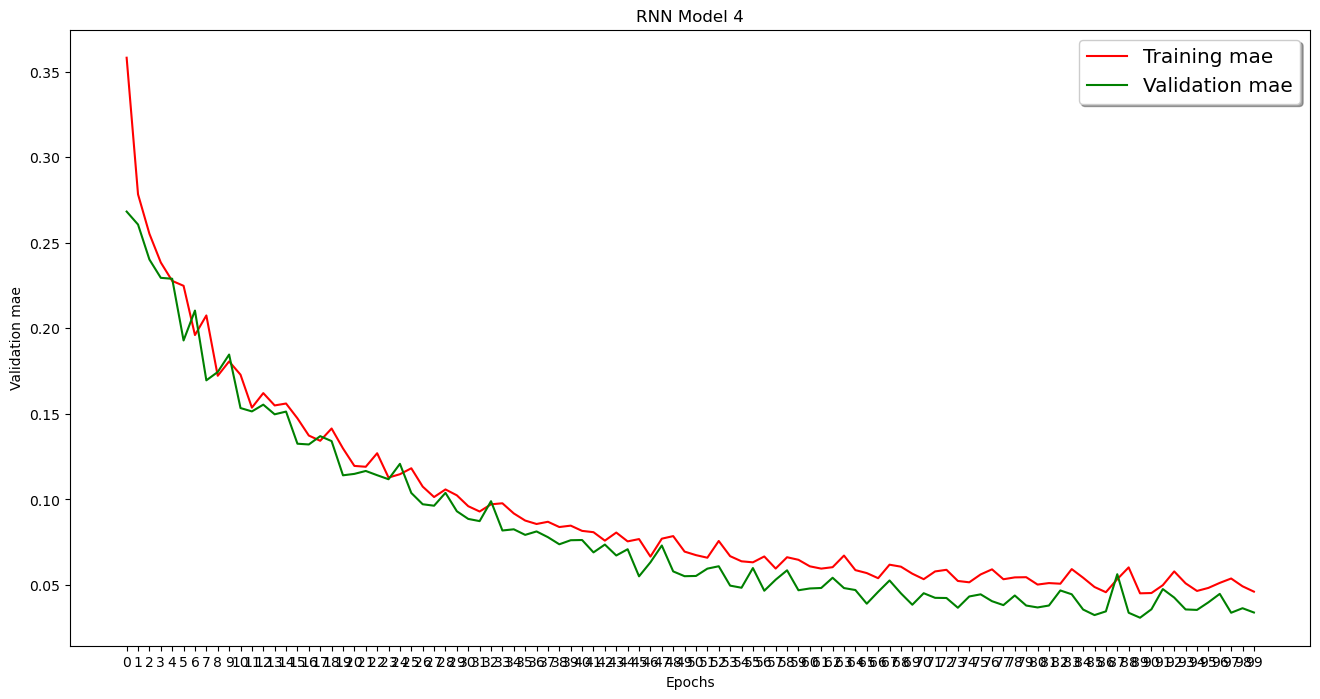

In [117]:
plot_mae(RNNmodel4history.history,100,"RNN Model 4")

The above graph shows that the model is always underfitting. However, the values show some interesting results. By increase, the number of time steps has a huge effect on predicting new data. This perfectly makes sense because compared to 1-time steps, 14-time steps have a greater impact when predicting the future. This time the model continued early, but from a greater scale point of view, the model is gradually toward not improving much over 100 epochs.

In [134]:
# calculate the mse
# predict on the test data
y_pred = RNNmodel4.predict(x_test)

# priont the shape
print(y_pred.shape)
print (y_test.shape)

y_pred_day1 = y_pred[:,0] # get only the first day 
print(y_pred_day1.shape)

# calculate the ms0e
mse = mean_squared_error(y_test, y_pred_day1)
print("MSE: ", mse)

6/6 [==============================] - 0s 17ms/step
(168, 14, 1)
(168, 1)
(168, 1)
MSE:  0.006275859854449402


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse</th>
  </tr>
  <tr>
    <td>RNNmodel1</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>25</td>
    <td>0.0003104747402564267</td>
  </tr>
  <tr>
    <td>RNNmodel2(LSTM)</td>
    <td>7</td>
    <td>6</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>adam</td>
    <td>30</td>
    <td>0.0002955482432834089</td>
  </tr>
  <tr>
    <td>RNNmodel3(LSTM)</td>
    <td>8</td>
    <td>7</td>
    <td>1</td>
    <td>tanh</td>
    <td>mean_squared_error</td>
    <td>RMSprop</td>
    <td>24</td>
    <td>0.001738154260858454</td>
    <tr>
        <td>RNNmodel4(LSTM,14_time_step)</td>
        <td>8</td>
        <td>7</td>
        <td>1</td>
        <td>tanh</td>
        <td>mean_squared_error</td>
        <td>RMSprop</td>
        <td>100</td>
        <td>0.006275859854449402</td>


</table>

The table result shows that model 4 also performs worse than baseline and even worse than model 3, increasing mse around 0.005. This is the worst result out of all the models I have created. Increasing the time of steps to 14 days worsens the model performance, meaning long past data is not meaningful in predicting the future as too many factors can affect the stock price. Therefore, in some cases, it is better to have less bias on past data and focus on more recent data.

<h1>Conclusion</h1>

-------------------------

This assignment aims to build and experiment with RNN in lstm, mainly to predict future Tesla stock high prices. I have experimented with different number configurations in larger network, increasing the number of hidden layers, changing optimizer, learning rates, activation function and time steps to beat my baseline model, even though I was wrong at the start. In the end, I have beaten my baseline model by around 0.0001 mse. However, I have also found out that increasing the number of time steps from 1 to 14 days worsens the model performance. 

The best model was RNNmodel2(LSTM) with 7 layers, 6 hidden layers, 1 output layer, tanh activation function, mean_squared_error loss function, adam optimizer, 30 epochs and 0.0002955482432834089 mse. This model is performing better than the baseline model by 0.0001 mse. Although it is not a huge difference, I have achieved my hypothesis that RNN can be used to predict future stock prices and beat my baseline model.

The model can predict the future tesla stock's high price if no external factors can affect the price; it is impossible to achieve real-world accuracy. This is my current model that performs well. However, there are also downsides in my implementation, I was only using the 1 data entry because I needed help understanding how to implement LSTM model with multiple input data to a singular prediction. I have failed many times during my attempts and ended up deleting and restarting almost all the time. The other issue with my implementation is that I couldn't calculate the three days into future algorism, which is why I didn't include the 3 days mse in my result table. I have tried to implement it but could not get it to work.

For future improvement, I will like to understand LSTM fully and implement all the thing that I have listed in future

-------------------------

Citations:

GERON, A. (2019) Hands-on machine learning with scikit-learn, Keras, and tensorflow: Concepts, tools and techniques to build Intelligent Systems. Beijing ; Boston ; Farnham etc.: O'Reilly. 